In [1]:


from random import random
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model as lm
import shap
import pandas as pd
import shap
import interpret.glassbox

C:\Users\mariajulia-ieg\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df= pd.read_excel("Forms_ConstruConecta.xlsx")
df

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,Não,18 - 20,Não,Não Informado,Sim,Sim,Não,Sim,Importante,Não Informado
1,1,Sim,18 - 20,Sim,Custo,Não,Sim,Não,Sim,Muito Importante,Contratação de serviços
2,2,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Sim,Sim,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,Sim,51 - 70,Não,Não Informado,Não,Sim,Sim,Sim,Muito Importante,Localização das iportunidades
4,4,Sim,71 - 80,Sim,Profissionais Qualificados,Sim,Sim,Não,Sim,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,Sim,51 - 70,Sim,Profissionais Qualificados,Sim,Sim,Não,Sim,Importante,Bastante relevante
268,268,Sim,51 - 70,Não,Não Informado,Não,Sim,Não Informado,Sim,Muito Importante,Economia e sustentabilidade
269,269,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Não,Não,Importante,Não sei
270,270,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Não,Sim,Muito Importante,Seriedade e acessibilidade


In [3]:
# Tratando valores ausentes com 'Não Informado' onde necessário
df = df.fillna('Não Informado')
df

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,Não,18 - 20,Não,Não Informado,Sim,Sim,Não,Sim,Importante,Não Informado
1,1,Sim,18 - 20,Sim,Custo,Não,Sim,Não,Sim,Muito Importante,Contratação de serviços
2,2,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Sim,Sim,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,Sim,51 - 70,Não,Não Informado,Não,Sim,Sim,Sim,Muito Importante,Localização das iportunidades
4,4,Sim,71 - 80,Sim,Profissionais Qualificados,Sim,Sim,Não,Sim,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,Sim,51 - 70,Sim,Profissionais Qualificados,Sim,Sim,Não,Sim,Importante,Bastante relevante
268,268,Sim,51 - 70,Não,Não Informado,Não,Sim,Não Informado,Sim,Muito Importante,Economia e sustentabilidade
269,269,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Não,Não,Importante,Não sei
270,270,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Não,Sim,Muito Importante,Seriedade e acessibilidade


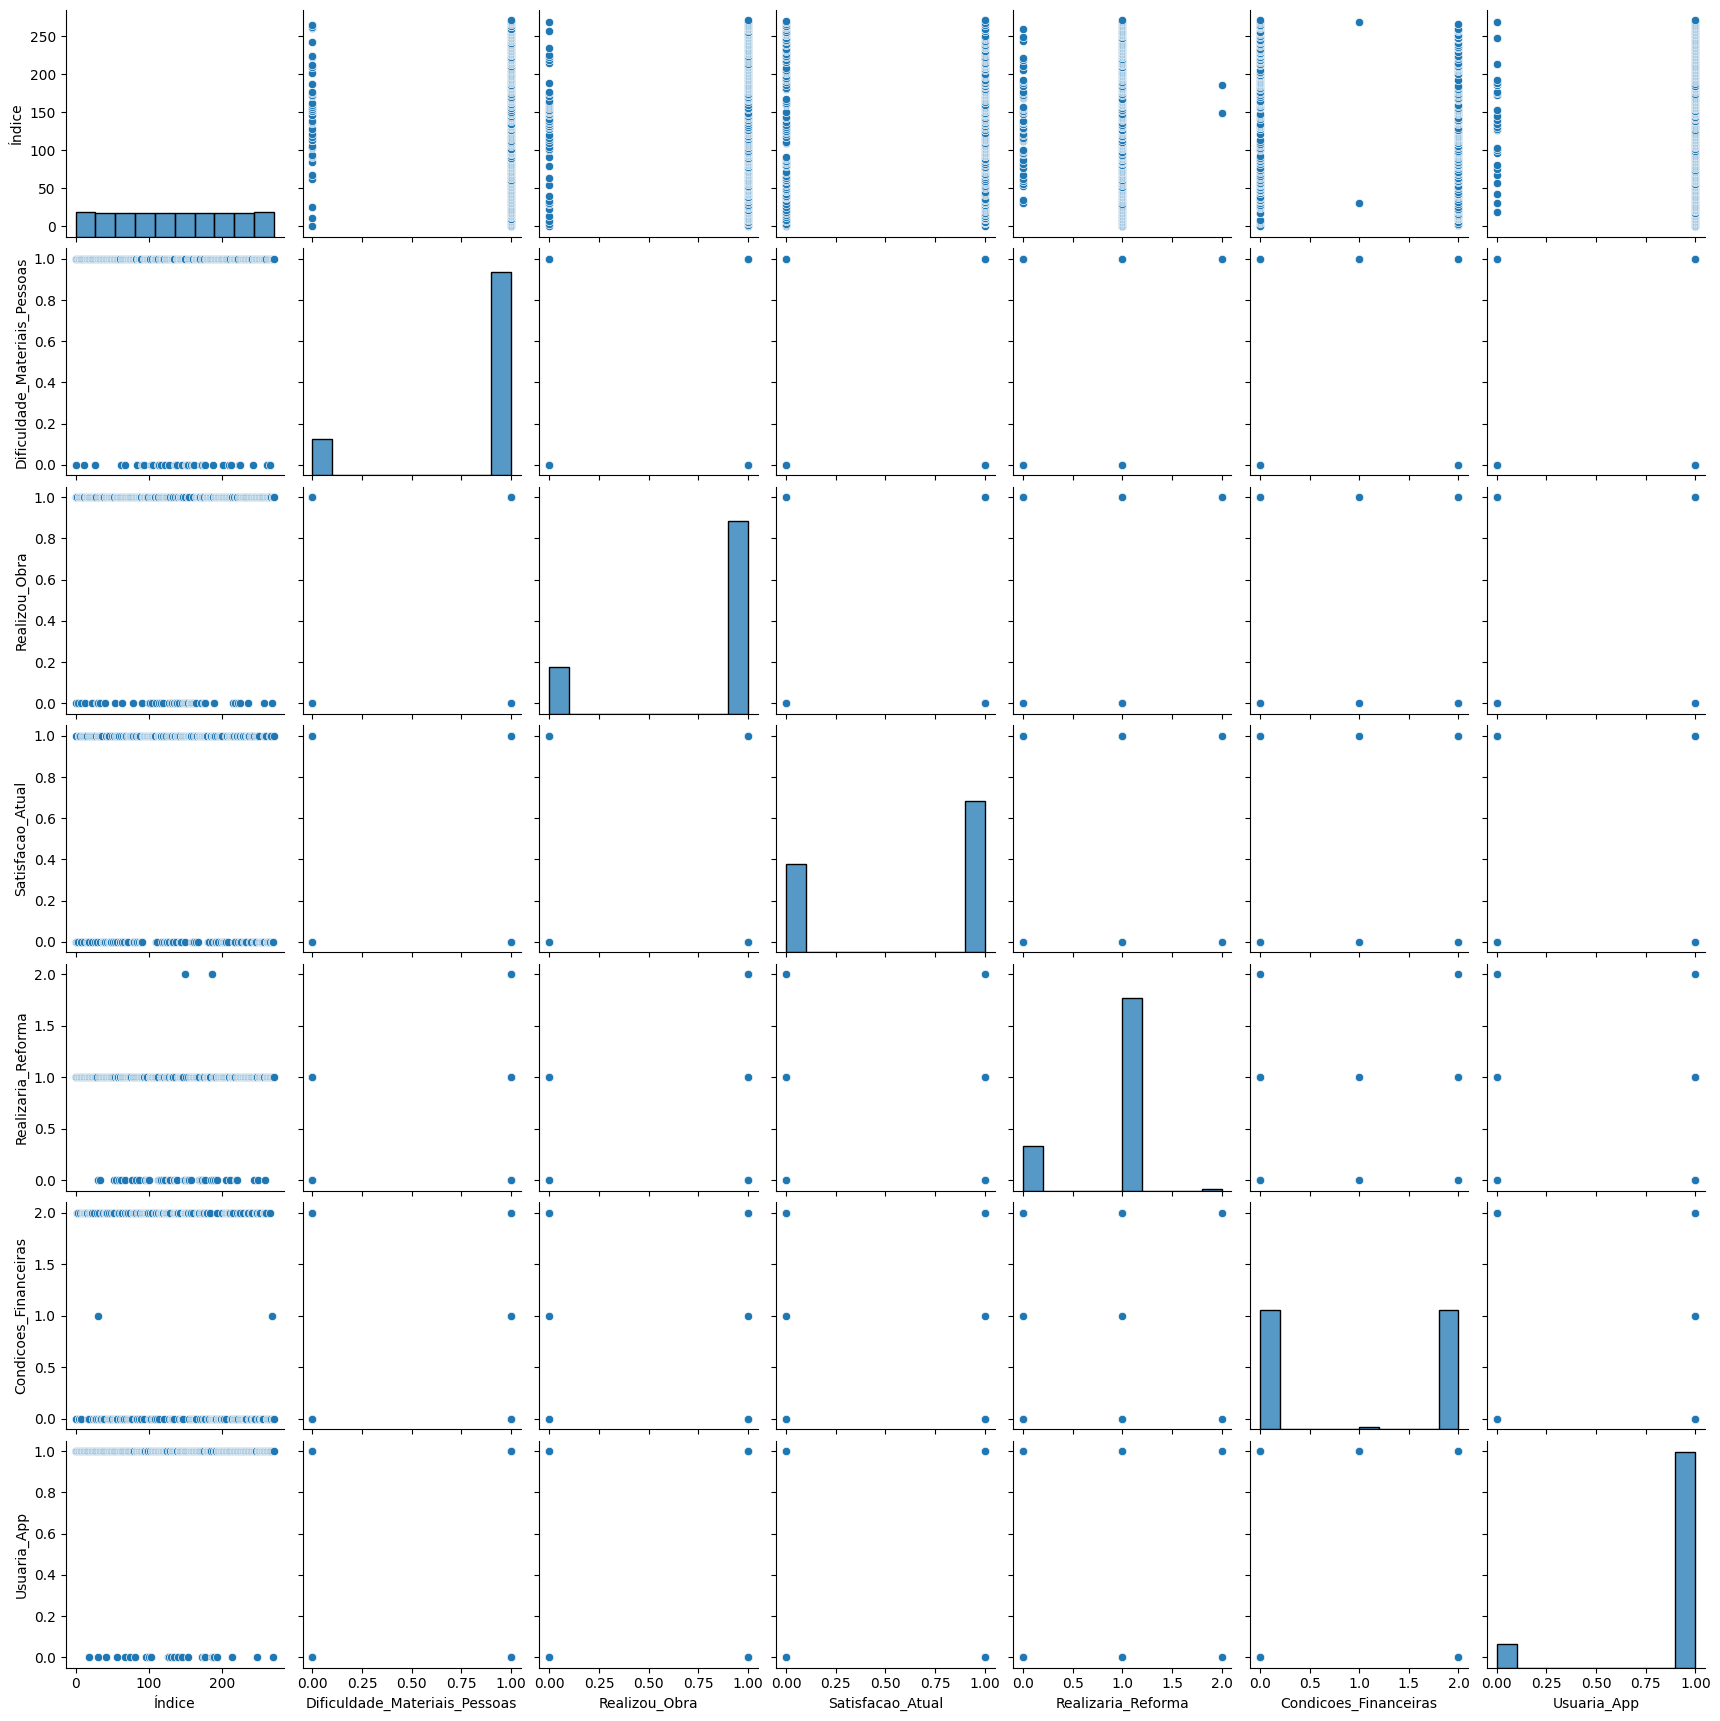

In [15]:
import pandas as pd


# Criando o pairplot
sns.pairplot(df)
plt.show()

In [5]:
le = LabelEncoder()

colunas_selecionadas = ['Dificuldade_Materiais_Pessoas', 'Realizou_Obra', 'Satisfacao_Atual', 'Realizaria_Reforma', 'Condicoes_Financeiras','Usuaria_App']

for i in colunas_selecionadas:
    df[i] = le.fit_transform(df[i])
display(df)

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,0,18 - 20,0,Não Informado,1,1,0,1,Importante,Não Informado
1,1,1,18 - 20,1,Custo,0,1,0,1,Muito Importante,Contratação de serviços
2,2,1,31 - 50,1,Profissionais Qualificados,0,1,2,1,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,1,51 - 70,0,Não Informado,0,1,2,1,Muito Importante,Localização das iportunidades
4,4,1,71 - 80,1,Profissionais Qualificados,1,1,0,1,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,1,51 - 70,1,Profissionais Qualificados,1,1,0,1,Importante,Bastante relevante
268,268,1,51 - 70,0,Não Informado,0,1,1,1,Muito Importante,Economia e sustentabilidade
269,269,1,31 - 50,1,Profissionais Qualificados,0,1,0,0,Importante,Não sei
270,270,1,31 - 50,1,Profissionais Qualificados,0,1,0,1,Muito Importante,Seriedade e acessibilidade


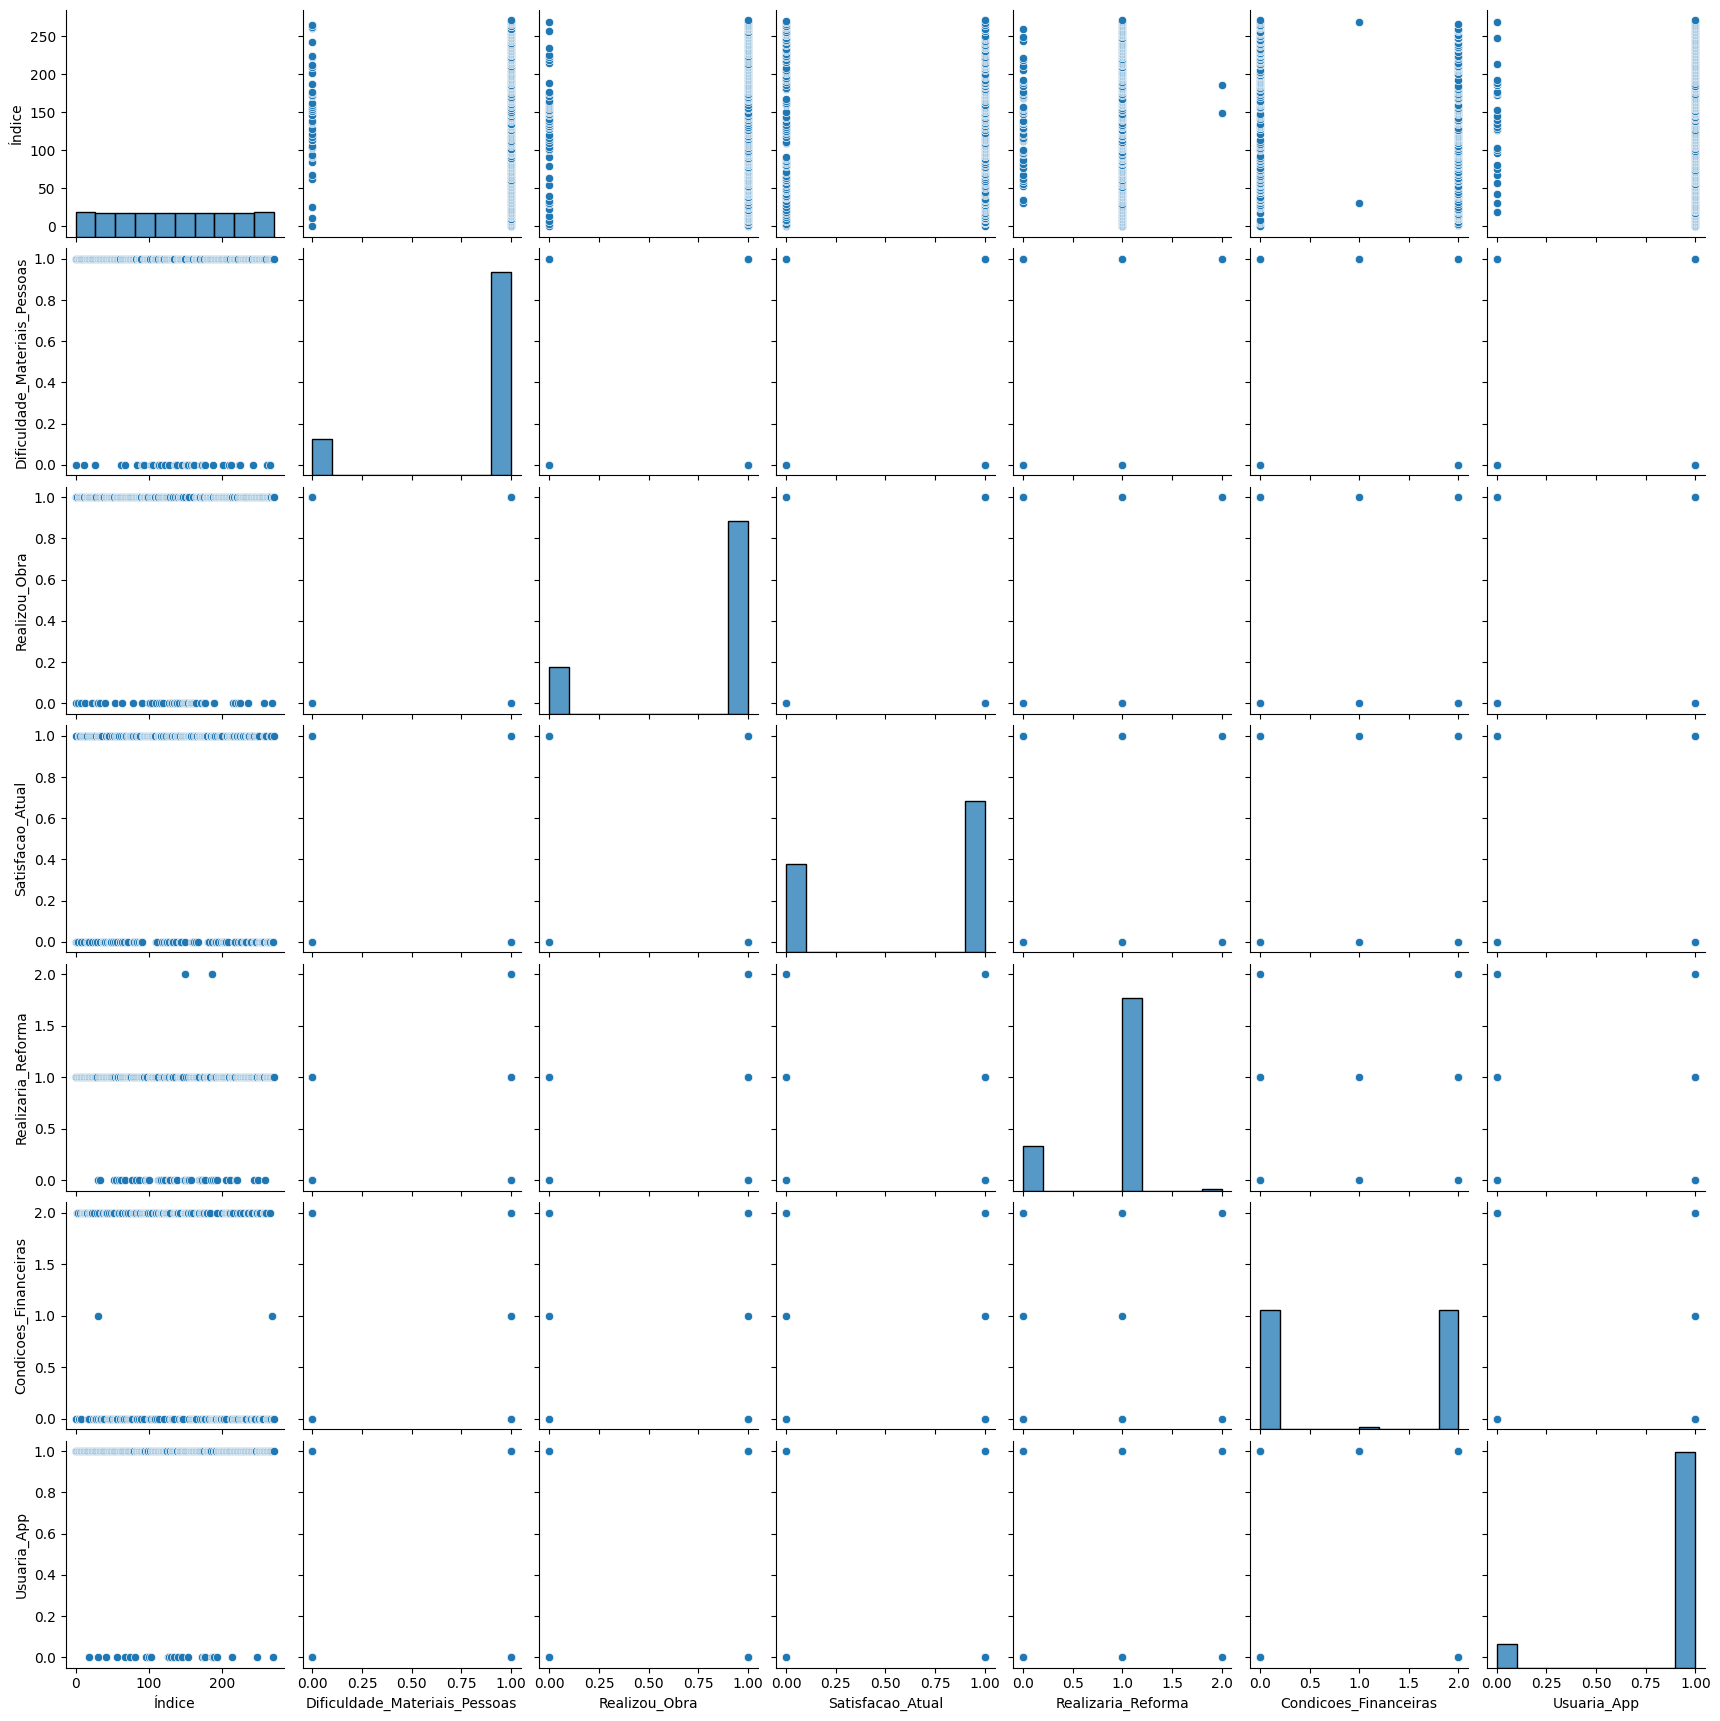

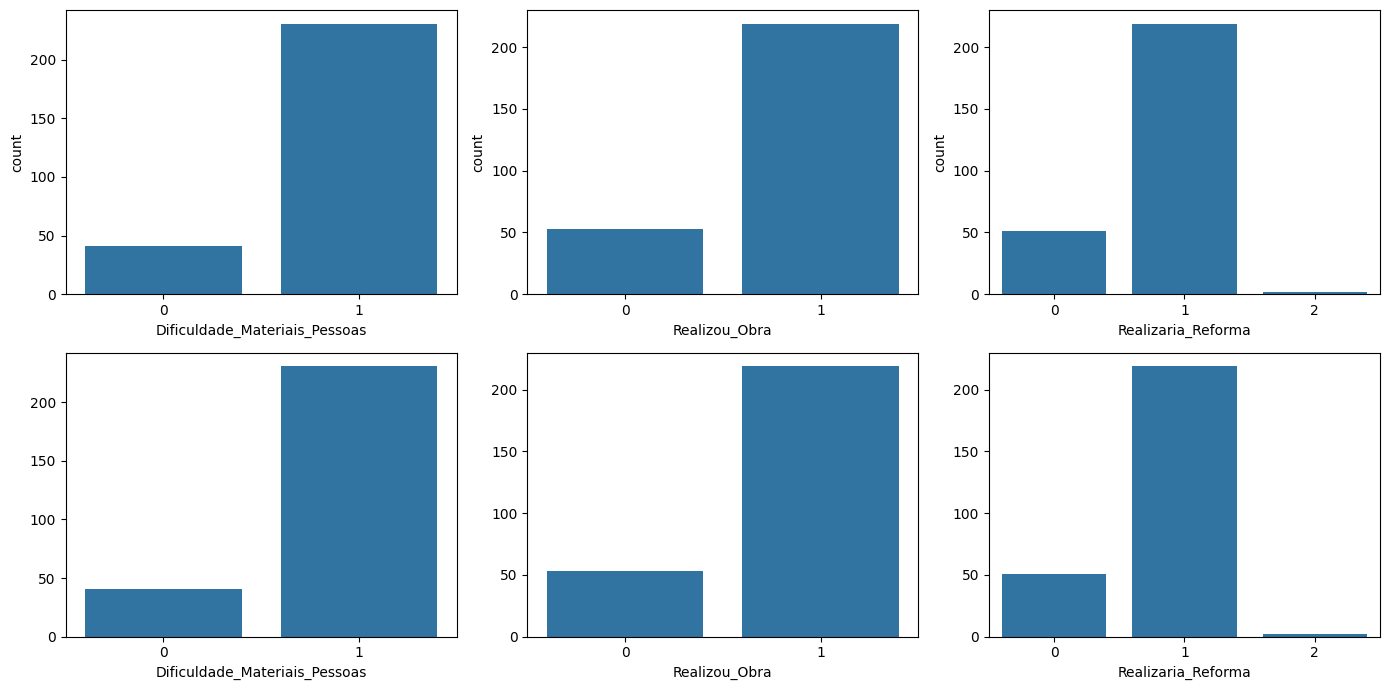

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 7))

# Count plots for categorical data
sns.countplot(x=df['Dificuldade_Materiais_Pessoas'], ax=axs[0, 0])
sns.countplot(x=df['Realizou_Obra'], ax=axs[0, 1])
sns.countplot(x=df['Realizaria_Reforma'], ax=axs[0, 2])

# Bar plots for the categorical data to show frequency
sns.barplot(x=df['Dificuldade_Materiais_Pessoas'].value_counts().index, 
            y=df['Dificuldade_Materiais_Pessoas'].value_counts().values, ax=axs[1, 0])
sns.barplot(x=df['Realizou_Obra'].value_counts().index, 
            y=df['Realizou_Obra'].value_counts().values, ax=axs[1, 1])
sns.barplot(x=df['Realizaria_Reforma'].value_counts().index, 
            y=df['Realizaria_Reforma'].value_counts().values, ax=axs[1, 2])

# Show the plots
plt.tight_layout()
plt.show()



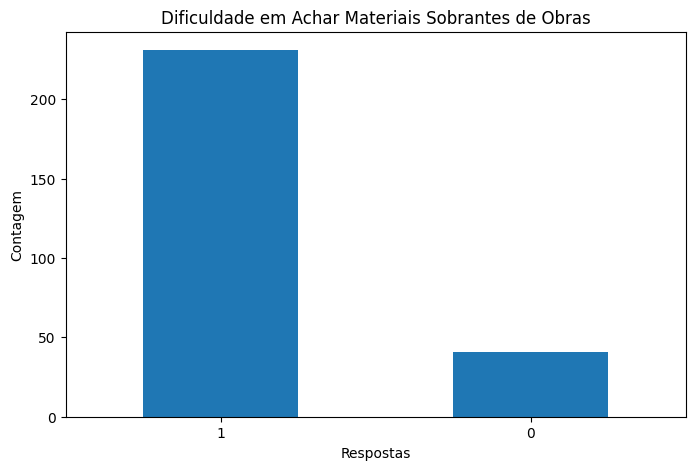

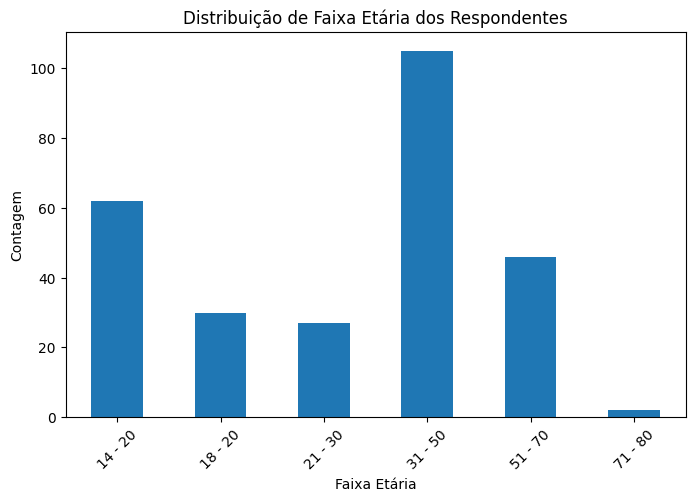

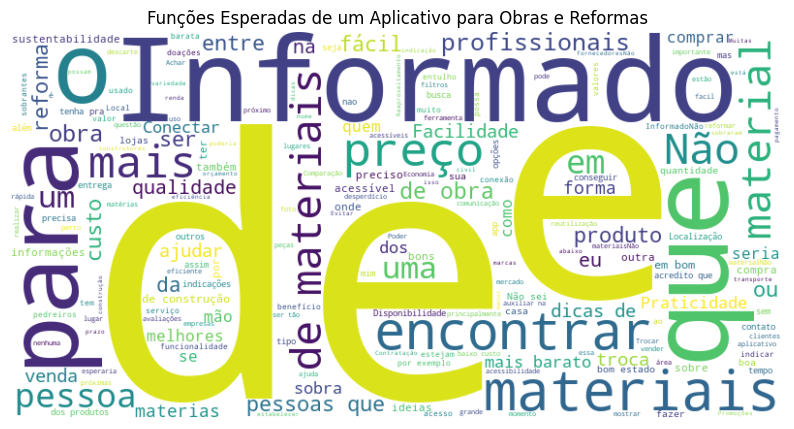

In [7]:

import matplotlib.pyplot as plt

# Gráfico 1: Distribuição de respostas sobre dificuldades em achar materiais sobrantes
plt.figure(figsize=(8, 5))
df['Dificuldade_Materiais_Pessoas'].value_counts().plot(kind='bar')
plt.title('Dificuldade em Achar Materiais Sobrantes de Obras')
plt.xlabel('Respostas')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

# Gráfico 2: Distribuição da faixa etária dos respondentes
plt.figure(figsize=(8, 5))
df['Faixa_Etaria'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Faixa Etária dos Respondentes')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()



# Gráfico 4: Funções esperadas de um aplicativo para obras e reformas (principais palavras)
from wordcloud import WordCloud

# Unindo todas as respostas em um texto único
text = ' '.join(df['Funcionalidade_no_App'].dropna())

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibindo o gráfico da nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Funções Esperadas de um Aplicativo para Obras e Reformas')
plt.show()



In [8]:
df.columns

Index(['Índice', 'Dificuldade_Materiais_Pessoas', 'Faixa_Etaria',
       'Realizou_Obra', 'Desafios', 'Satisfacao_Atual', 'Realizaria_Reforma',
       'Condicoes_Financeiras', 'Usuaria_App', 'Valorizacao_Sustentabilidade',
       'Funcionalidade_no_App'],
      dtype='object')

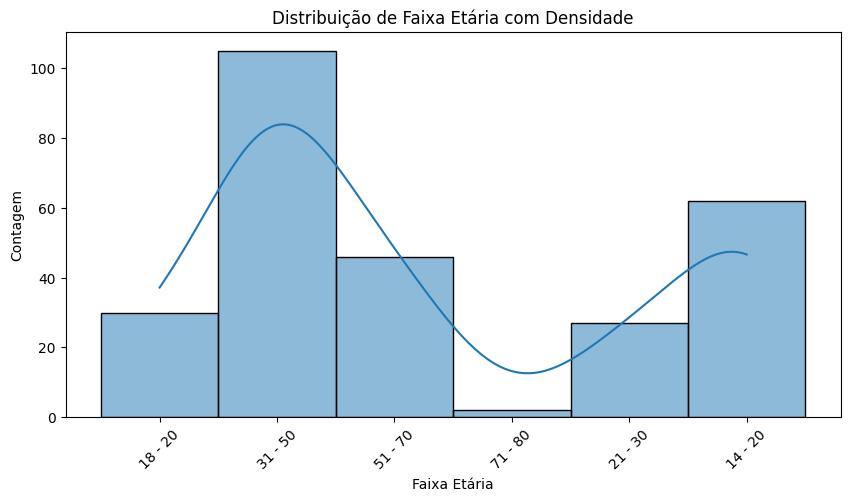

In [9]:
import seaborn as sns

# Gráfico 5: Histogramas para ver a distribuição de idade dos respondentes
plt.figure(figsize=(10, 5))
sns.histplot(df['Faixa_Etaria'], kde=True)
plt.title('Distribuição de Faixa Etária com Densidade')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [10]:
le = LabelEncoder()

colunas_selecionadas = ['Dificuldade_Materiais_Pessoas', 'Realizou_Obra', 'Satisfacao_Atual', 'Realizaria_Reforma', 'Condicoes_Financeiras','Usuaria_App']

for i in colunas_selecionadas:
    df[i] = le.fit_transform(df[i])
display(df)

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,0,18 - 20,0,Não Informado,1,1,0,1,Importante,Não Informado
1,1,1,18 - 20,1,Custo,0,1,0,1,Muito Importante,Contratação de serviços
2,2,1,31 - 50,1,Profissionais Qualificados,0,1,2,1,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,1,51 - 70,0,Não Informado,0,1,2,1,Muito Importante,Localização das iportunidades
4,4,1,71 - 80,1,Profissionais Qualificados,1,1,0,1,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,1,51 - 70,1,Profissionais Qualificados,1,1,0,1,Importante,Bastante relevante
268,268,1,51 - 70,0,Não Informado,0,1,1,1,Muito Importante,Economia e sustentabilidade
269,269,1,31 - 50,1,Profissionais Qualificados,0,1,0,0,Importante,Não sei
270,270,1,31 - 50,1,Profissionais Qualificados,0,1,0,1,Muito Importante,Seriedade e acessibilidade


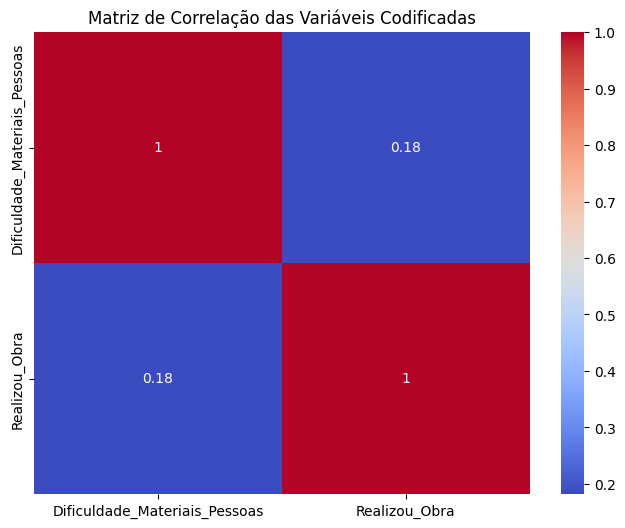

In [11]:
df_encoded = df.copy()


# Seleção das colunas codificadas
correlation_data = df_encoded[['Dificuldade_Materiais_Pessoas', 'Realizou_Obra']]

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Codificadas')
plt.show()

In [12]:
# não = 0
# sim = 1
# não informado = 2 

le = LabelEncoder()

colunas_selecionadas = ['Dificuldade_Materiais_Pessoas', 'Realizou_Obra', 'Satisfacao_Atual', 'Realizaria_Reforma', 'Condicoes_Financeiras','Usuaria_App']

for i in colunas_selecionadas:
    df[i] = le.fit_transform(df[i])
display(df)

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,0,18 - 20,0,Não Informado,1,1,0,1,Importante,Não Informado
1,1,1,18 - 20,1,Custo,0,1,0,1,Muito Importante,Contratação de serviços
2,2,1,31 - 50,1,Profissionais Qualificados,0,1,2,1,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,1,51 - 70,0,Não Informado,0,1,2,1,Muito Importante,Localização das iportunidades
4,4,1,71 - 80,1,Profissionais Qualificados,1,1,0,1,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,1,51 - 70,1,Profissionais Qualificados,1,1,0,1,Importante,Bastante relevante
268,268,1,51 - 70,0,Não Informado,0,1,1,1,Muito Importante,Economia e sustentabilidade
269,269,1,31 - 50,1,Profissionais Qualificados,0,1,0,0,Importante,Não sei
270,270,1,31 - 50,1,Profissionais Qualificados,0,1,0,1,Muito Importante,Seriedade e acessibilidade
